<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/PlotAnimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

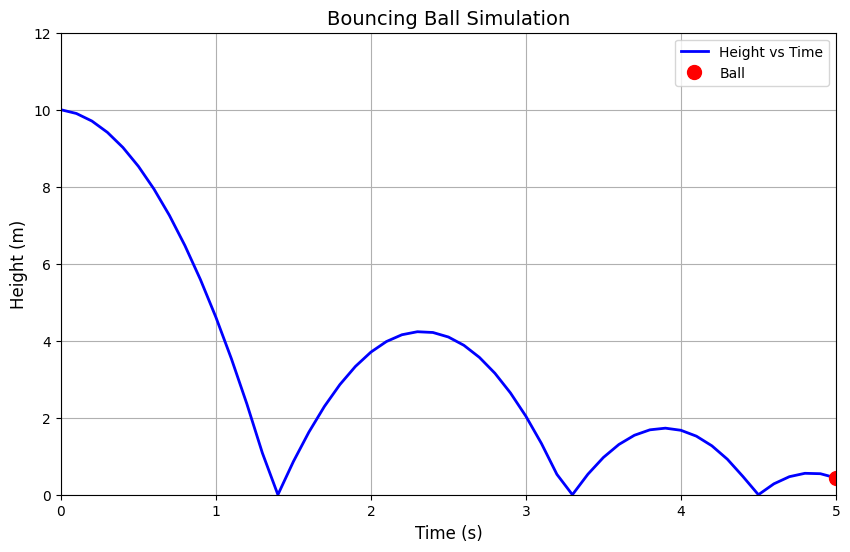

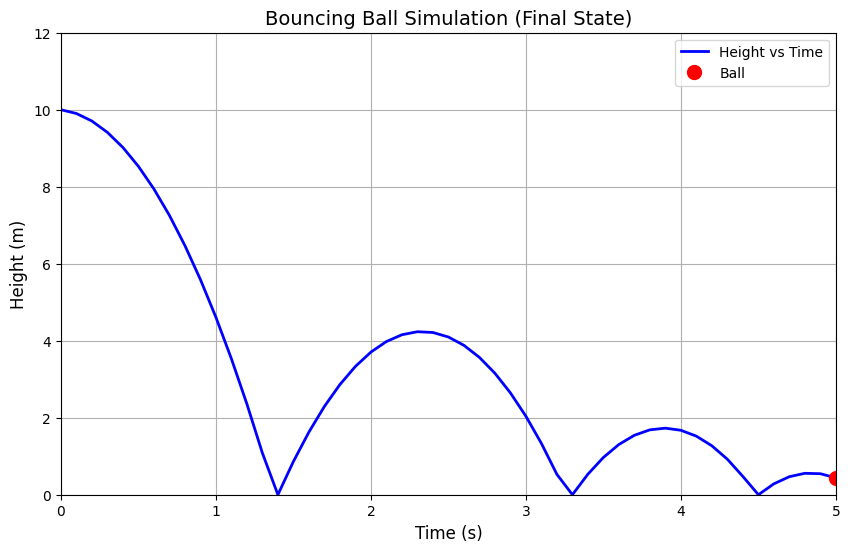

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

# Physical parameters and initial conditions
gravity = -9.80        # Acceleration due to gravity in m/s^2
dt = 0.1             # Time step in seconds
coef_restitution = 0.7  # How bouncy the ball is (1 = perfect bounce, 0 = no bounce)

# Initial state of the ball
position = 10.0       # Starting height in meters
velocity = 0.0        # Starting velocity in m/s

# Lists to store the motion history
time_data = [0]
position_data = [position]

def update_physics():
    """
    Updates the physics of the bouncing ball for one time step.
    Returns the new position of the ball.
    """
    global position, velocity

    # Update velocity using acceleration (gravity)
    velocity += gravity * dt

    # Update position using velocity
    position += velocity * dt

    # Check for ground collision
    if position < 0:
        position = 0  # Place ball at ground level
        velocity = -velocity * coef_restitution  # Reverse and reduce velocity

    # Store the current state for plotting
    current_time = time_data[-1] + dt
    time_data.append(current_time)
    position_data.append(position)

    return position

# Set up the plot style

fig_size = (10, 6)

# Run the animation
total_time = 5  # Total simulation time in seconds
frames = int(total_time / dt)  # Number of frames to simulate

for frame in range(frames):
    # Clear the previous frame
    display.clear_output(wait=True)

    # Create a new figure for this frame
    plt.figure(figsize=fig_size)

    # Calculate new position
    new_pos = update_physics()

    # Plot the trajectory
    plt.plot(time_data, position_data, 'b-', label='Height vs Time', linewidth=2)

    # Plot the current ball position
    plt.plot(time_data[-1], new_pos, 'ro', markersize=10, label='Ball')

    # Configure the plot
    plt.xlim(0, total_time)
    plt.ylim(0, 12)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Height (m)', fontsize=12)
    plt.title('Bouncing Ball Simulation', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=10)

    # Display the current frame
    plt.show()

    # Add a small delay to control animation speed
    time.sleep(0.01)

# Final plot that stays on screen
plt.figure(figsize=fig_size)
plt.plot(time_data, position_data, 'b-', label='Height vs Time', linewidth=2)
plt.plot(time_data[-1], position_data[-1], 'ro', markersize=10, label='Ball')
plt.xlim(0, total_time)
plt.ylim(0, 12)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Height (m)', fontsize=12)
plt.title('Bouncing Ball Simulation (Final State)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()